# CREDIT CARD FRAUD DETECTION

The dataset contains the transactions between people that they are fraud or not, and we are asked to differentiate between them. The main aim is to tackle this situation by building classification models to classify and distinguish fraud transactions.

In [1]:
#Importing necessary libararies 

In [2]:
# IMPORTING PACKAGES

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

In [3]:
#loading the data
df = pd.read_csv("creditcard.csv")
df.drop('Time', axis = 1, inplace = True)

In [4]:
#exploring the datset
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

The data contains features V1 to V28 which are the principal components obtained by PCA. We are going to neglect the time feature which is of no use to build the models.

The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not.

In [5]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [6]:
df.shape

(284807, 30)

In [7]:
print(df.describe())

                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15 -1.552563e-15   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15  1.768627e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.

In [8]:
#unique values we are having for the target variable.
print(df['Class'].unique())

[0 1]


The target variable Class has 0 and 1 values.

Here 0 for valid transactions 1 for fraud transactions, because we aim to find fraud transactions, the dataset's target value has a positive value for that.

In [9]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


From this we can see that out of 284,807 samples, there are only 492 fraud cases which is only 0.17 percent of the total samples. So, I can say that the data I am dealing with highly imbalanced data and needs to be handled carefully when modeling and evaluating.

In [10]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


Looking at the statistics, we can say that values in 'Amount' variable are varying tremendously when compared to the other variables.
To normalize this i'll use standard scaler to reduce wide range between the variables.

In [11]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


# Exploratory Data Analysis and Data Processing

Checking for fraud cases and non-fraud cases in the dataset. Along with that,i'll also compute the percentage of fraud cases in the overall recorded transactions.

In [12]:
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
LABELS = ["Non-fraud", "fraud"]

Text(0, 0.5, 'Frequency')

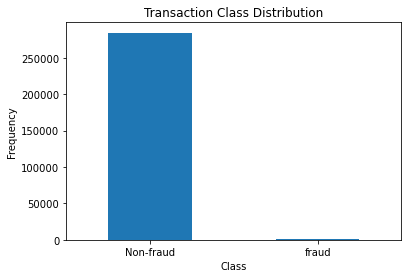

In [13]:
#plotting a bargraph
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot =0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")
plt.ylabel("Frequency")

Conclusion: This is an inbalance dataset which displays, more than 250000 of valid transactions whereas fraud transaction are very very low.



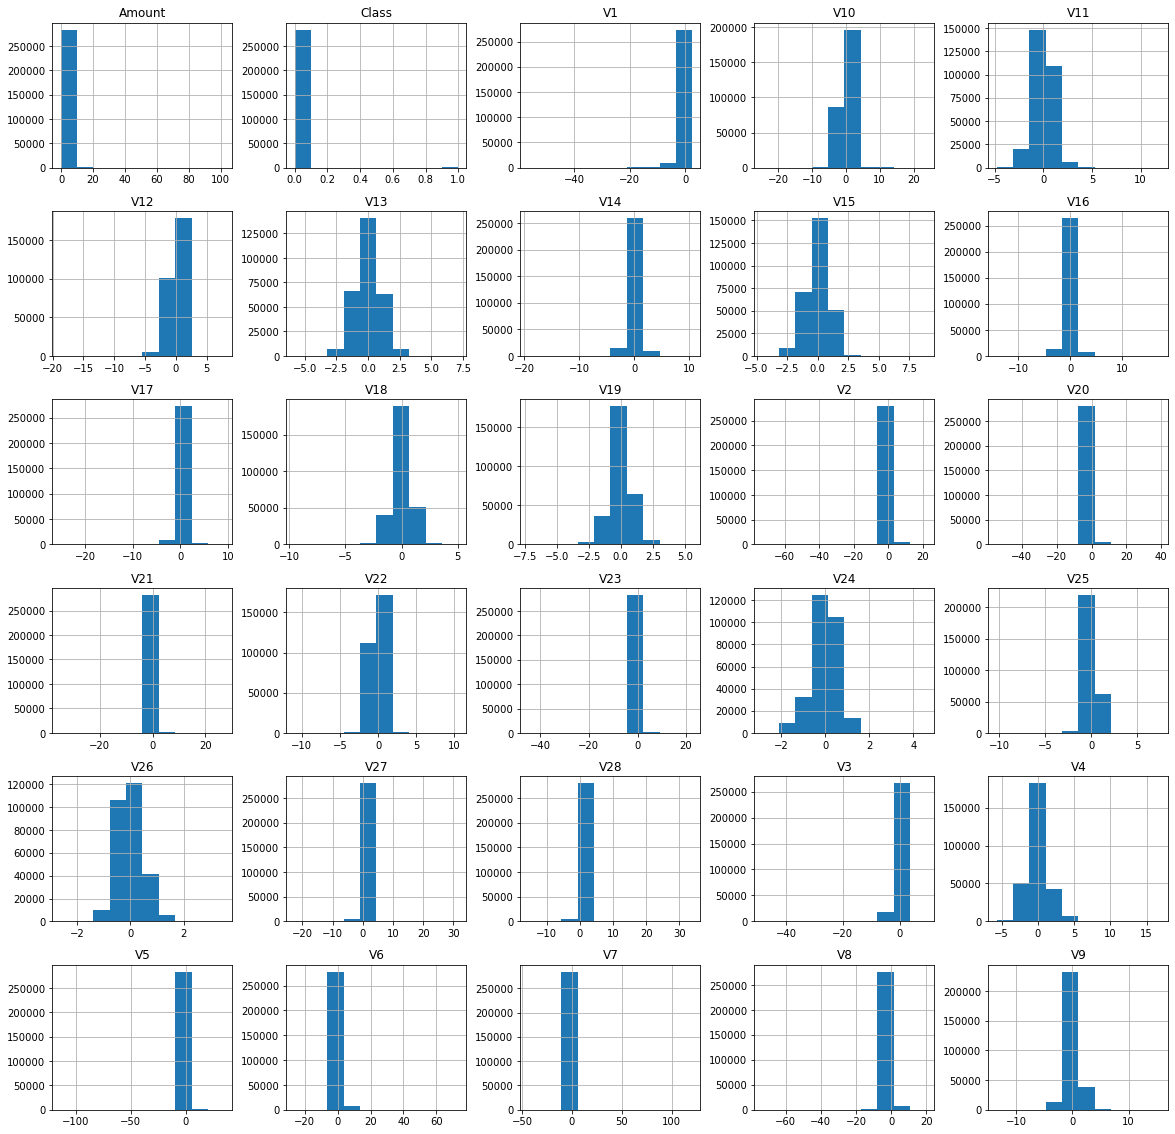

In [14]:
#Plotting histograms
df.hist(figsize = (20,20))
plt.show()

Conclusion: This looks like most of the V's are clustered right around 0 with some large outliers or maybe no outliers. Also, very few 1 non fraud or fraud transactions in comparison to our non fraud transactions found.

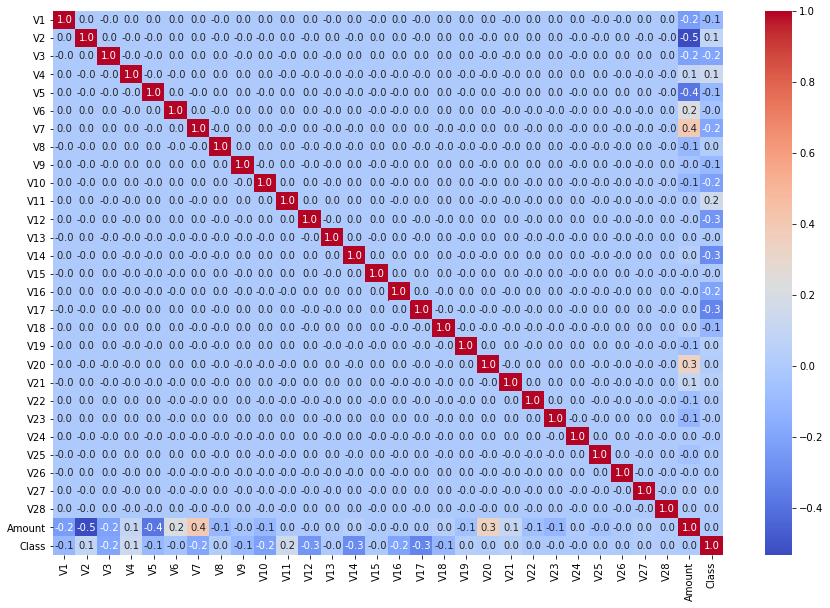

In [15]:
#Correlation Matrix 
#getting correlations of each features in dataset
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f') 
plt.show()

It seems that we don’t have highly correlated features although there is slightly negative correlation between ‘V2’ and ‘Amount’ features. The ‘Amount’ feature is slightly correlated with the other features as well, meaning that it can partially be calculated by them so we can try dropping it.

In [16]:
outlier_fraction = len(fraud_cases)/float(len(nonfraud_cases))
print(outlier_fraction)

0.0017304750013189597


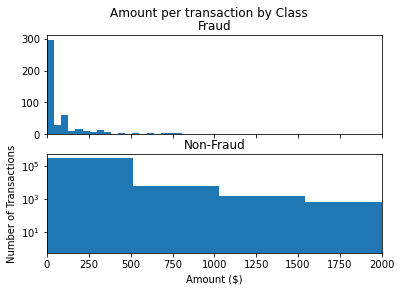

In [17]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by Class")
bins = 50

ax1.hist(fraud_cases.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(nonfraud_cases.Amount, bins = bins)
ax2.set_title("Non-Fraud")
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,2000))
plt.yscale('log')
plt.show();

Conclusion: The graphs says that the transaction amount form fraud dataset is very small.

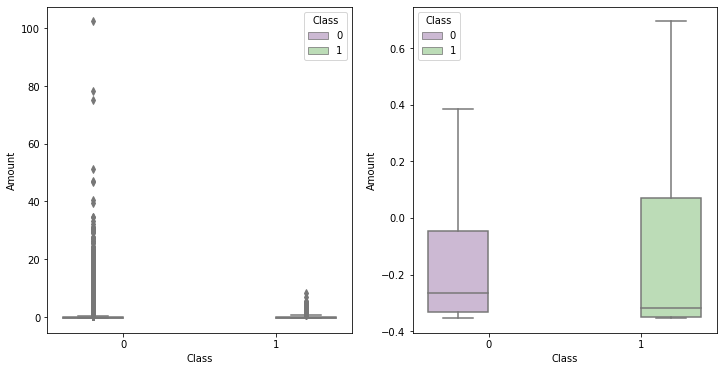

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

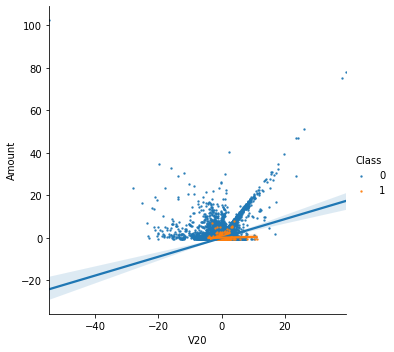

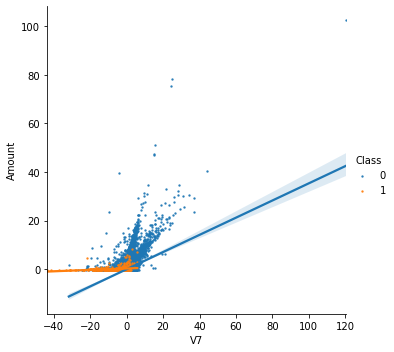

In [19]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Conclusion: The two features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

C:\Users\Vishakha\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Vishakha\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

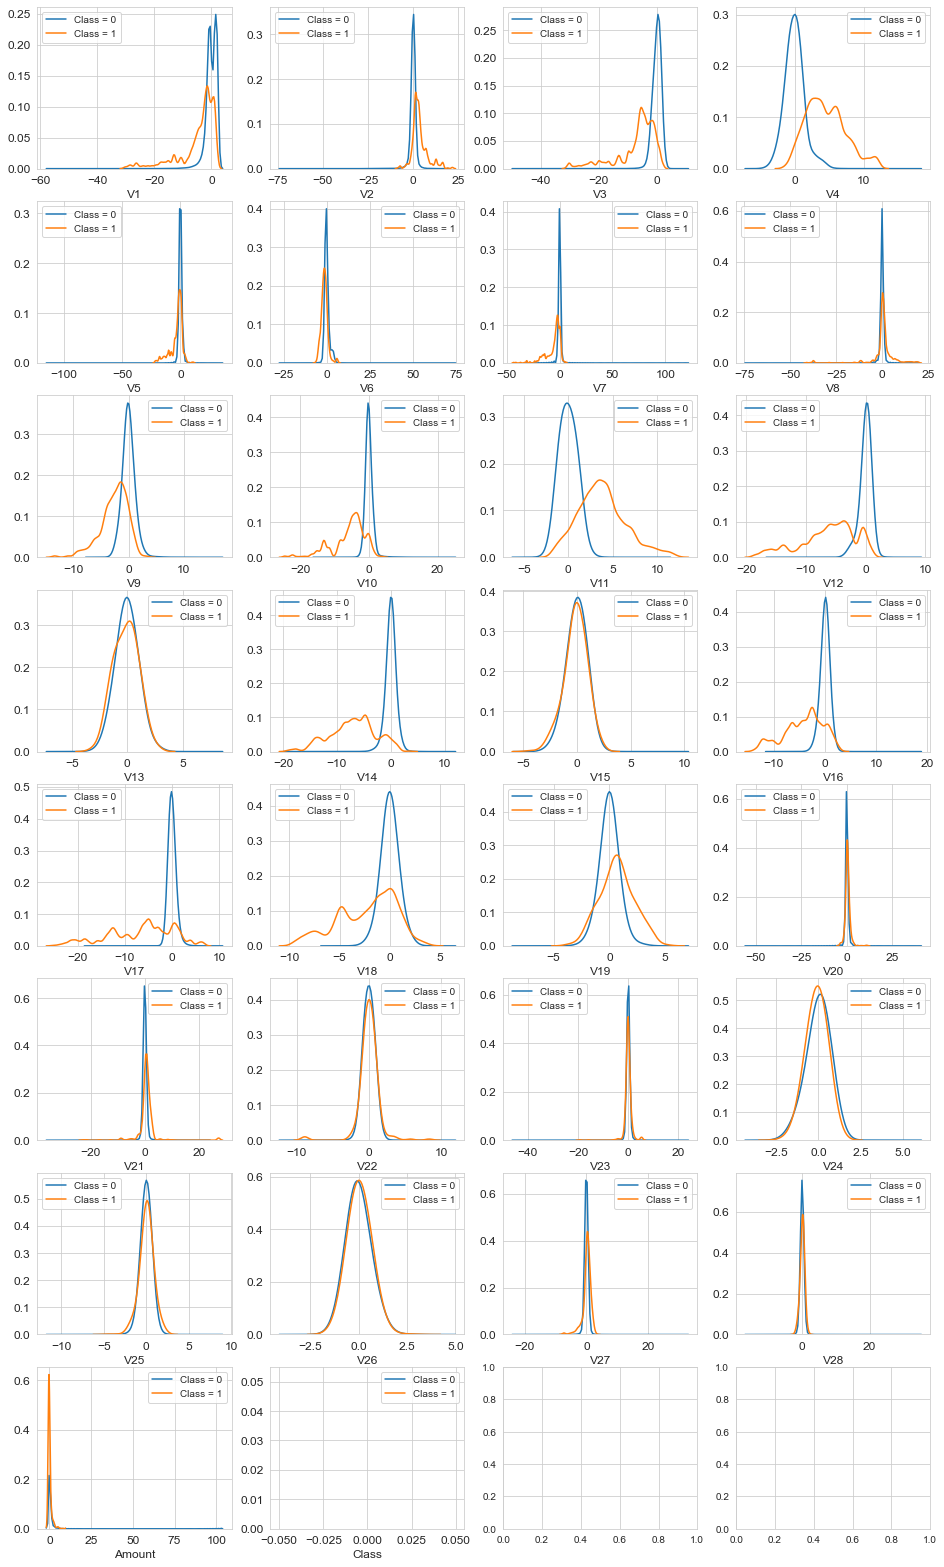

In [20]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Conclusion: Class V4, V11 have separated distributions for Class values 0 and 1 // V12, V14, V18 are partially separated // V1, V2, V3, V10 have a distinct profiles, while V25, V26, V28 have similar profiles for the two values of Class.

# Data Splitting

Defining the independent (X) and the dependent variables (Y).

Using the defined variables,splitting the data into a training set and testing set which is further used for modeling and evaluating.

We can split the data easily using the ‘train_test_split’ algorithm.

In [21]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


To build our classification model I have all the necessary variables.

# Model Prediction

The types of algorithms I'll use to do the detection on the dataset:

1. Decision Tree: It is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

2. Logistic Regression : It is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

3. K-Nearest Neighbors (KNN) : This is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

4. Random Forest : This is an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.

5. Support Vector Machine (SVM) : This is supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

Let's begin with implementing these models.

In [23]:
#1. Implementing Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [24]:
#2. Implementing Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [25]:
#3. Implementing K-Nearest Neighbors (KNN)

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [26]:
#4. Implementing Random Forest 

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [27]:
#3. Implementing Support Vector Machine (SVM)

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

I have built five different types of Classification models. Now next ste is to evaluate and identify which is the most appropriate one for this case.

# Analysis of the Models

Now i'll evaluate the models using evaluation metrics like accuracy score,f1 score metric and confusion metric.
My main objective inn this process is to find the best model.

1. Accuracy score : This is one of the most basic evaluation metrics which is used to evaluate classification models.
It can generally be expressed as:
    
  Accuracy score = No.of correct predictions / Total no.of predictions

Now, let's begin with accuracy score of all the models.

In [28]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------


As per the accuracy score evaluation metrics, KNN model's score reveals most precise score. Although if we take the round figure of all the accuracy score's it shows 0.99%, (99% accurate) which is a very good score.

2. F1 score : It can be simply defined as the harmonic mean of the model’s precision and recall.

    F1 score = 2( (precision * recall) / (precision + recall) )

In [29]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7796610169491525
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------


As per the f1 score evaluation metrics, KNN model's score reveals the best score and logistic Regression becomes the least accurate model

3. Confusion Matrix :It is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones.
Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table.

In [30]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine

In [32]:
plt.rcParams['figure.figsize'] = (4, 4)

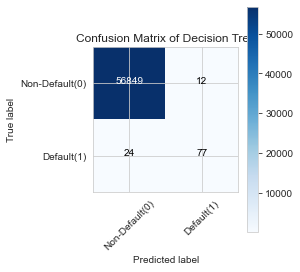

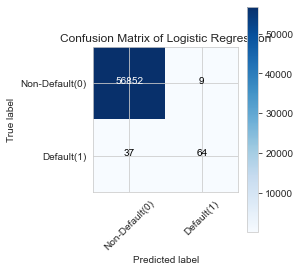

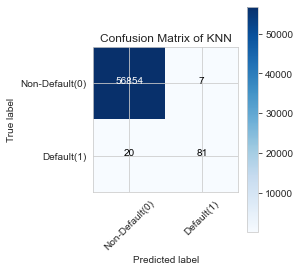

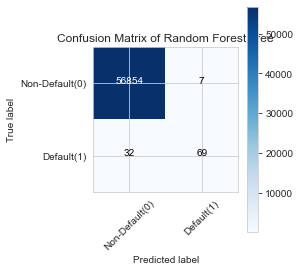

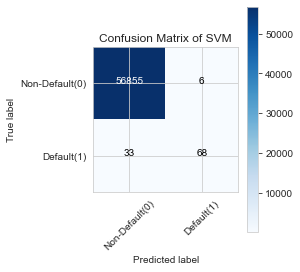

In [33]:
# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()



# 2. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()



# 3. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()



# 4. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()



# 5. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

Look at the first row of confusion matrix of the SVM model,the transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56855 of them as 0 and 6  of them as 1. It means, for 56854 non-fraud transactions, the actual churn value was 0 in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.


Now,looking at the second row, there are 101 transactions whose fraud value was 1. The classifier correctly predicted 68 of them as 1, and 33 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model.

And now, while comparing the confusion matrix of all the models, it can be seen that the K-Nearest Neighbors(KNN) model has performed better in classifying the fraud transactions from the non-fraud transactions followed by the Decision Tree model. So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Logistic regression model.

# Conclusion

In this case,I evaluated that K-nearest Neighbors(KNN) model has performed better then the other four models and it showed very percised results.